In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [5]:
data=pd.read_csv("/content/drive/MyDrive/pokemon_alopez247.csv")
data_x=data.iloc[:,1:15]
data_y=data['isLegendary']
#print(data_x.isna())
#print(data_y.isna())
x1=data_x.fillna(0)
#print(data_x.isna())
x2=x1.drop('Pr_Male',axis=1)
x3=x2.drop('isLegendary',axis=1)
#print(x3)

x3=x3.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)
x3.insert(0,"w0",1)
x=np.array(x3)
y=np.array(data_y)
print(x)

[[ 1.         -0.90451029 -0.89751046 ... -0.41649972 -0.55977324
  -0.72148811]
 [ 1.         -0.3242007  -0.44899449 ... -0.14839512 -0.49130751
  -0.72148811]
 [ 1.          0.44954542  0.24103008 ...  0.82827162  0.48517095
  -0.72148811]
 ...
 [ 1.         -0.71107376  0.86205219 ... -0.41649972 -0.53844785
  -1.26998065]
 [ 1.          0.44954542  1.20706447 ... -0.60800301 -0.53620307
  -1.26998065]
 [ 1.          0.44954542  1.20706447 ...  0.53144153  1.55144054
  -1.26998065]]


In [6]:

 #Logistic Regression
w_values=[]
error_rate=[]

def Linear(w):
   
  y_predict=[]
  for i in range(0,721):
    c=0
    for j in range(0,len(w)):
      c+=w[j]*x[i][j]
    y_predict.append(c)
  w_values.append(w)
  #print(w_values)
  
  y_f_x=[]
  for i in range(0,721):
    den=(1+np.exp(-y_predict[i]))
    val=1/den
    y_f_x.append(round(val,2))
  #print(y_f_x)
  
  j_theta=[]
  for i in range(0,721):
    if (y_f_x[i]!=0):
      j_theta.append((y[i]*np.log2(y_f_x[i]))+(1-y[i])*(1-np.log2(y_f_x[i])))
    else:
      j_theta.append(0)
  #print(j_theta)
  j_t_sum=np.array(j_theta).mean()
  #print(round(j_t_sum,3))
  error_rate.append(j_t_sum)
  y_grad=[]
  for j in range(0,12):
    x_g=0
    for i in range(0,721):
      x_g+=(x[i][j]*(y[i]-y_f_x[i]))
    y_grad.append(x_g)
  new_y=[]
  for j in range(0,12):
    new_y.append(round(w[j]-(0.1)*(1/721)*y_grad[j],4))
  #print(new_y)
  return new_y

w=[1,1,1,1,1,1,1,1,1,1,1,1,1]
for i in range(721):
  w=Linear(w)

print(error_rate)
z=np.array(error_rate).min()
#index = 0
index=error_rate.index(z)
print(w_values[index])
  

[2.3708847328975238, 2.3024385621363703, 2.2914374922861316, 2.2844278740498964, 2.2571009928708796, 2.237377618200126, 2.237068028823173, 2.1490978369821363, 2.0941880396991843, 2.085715665273265, 2.0508954909840824, 2.0471361574136777, 2.0437765435011994, 1.9789310050268407, 1.966859316027587, 1.9462454029605256, 1.9374024365925429, 1.9153105701123516, 1.9027525411147101, 1.8821319317294767, 1.8723120974832483, 1.8721770141103042, 1.8704752369887665, 1.862057247914243, 1.8437686234507062, 1.8329920099887607, 1.8044929227465207, 1.7942218864562545, 1.7699158112251443, 1.7584111943583438, 1.7346772183526173, 1.7047784953420413, 1.6830949041694916, 1.6752493025466295, 1.6633514103420464, 1.6628572404812982, 1.6523125987056593, 1.6404911571135226, 1.6329363985386725, 1.6324593757166974, 1.632667313509039, 1.6318329250789463, 1.6229421284674572, 1.623126905713098, 1.60102931155772, 1.5887631082731233, 1.588283663619621, 1.587704490149275, 1.575862713844893, 1.5650658449049557, 1.566258639

In [12]:
import numpy as np
import pandas as pd

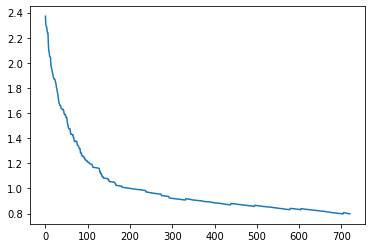

In [15]:
iter=np.arange(721)
plt.plot(iter,error_rate)